In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import keras as ks
import tensorflow as tf

In [4]:
df = pd.read_csv(r'C:\Users\d00434987\Downloads\Crypto.csv', encoding = 'UTF-8')
df = df.dropna()

In [5]:
df['Date']= pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [6]:
df.set_index('Date')

,BitCoin,Binance Coin,Ethereum,Tether USD
Date,,,,
2017-11-09,7143.580078,1.990770,320.884003,1.008180
2017-11-10,6618.140137,1.796840,299.252991,1.006010
2017-11-11,6357.600098,1.670470,314.681000,1.008990
2017-11-12,5950.069824,1.519690,307.907990,1.012470
2017-11-13,6559.490234,1.686620,316.716003,1.009350
...,...,...,...,...
2022-10-14,19185.656250,269.567169,1297.422119,1.000074
2022-10-15,19067.634770,268.404083,1274.871704,1.000087
2022-10-16,19268.093750,272.519958,1306.296631,1.000057


In [7]:
columns = ['BitCoin', 'Binance Coin', 'Ethereum', 'Tether USD']
data = df[columns]
mean = data.mean()
median = data.median()
mode = data.mode()

print("Mean: ")
print(mean)
print("Median: ")
print(median)
print("Mode: ")
print(mode)

Mean: 
BitCoin         20208.756510
Binance Coin      141.300228
Ethereum         1123.004582
Tether USD          1.001649
dtype: float64
Median: 
BitCoin         10668.968750
Binance Coin       23.133812
Ethereum          466.665009
Tether USD          1.000523
dtype: float64
Mode: 
      BitCoin  Binance Coin     Ethereum  Tether USD
0     6741.75      1.510360    84.308296    1.000060
1         NaN      1.519690    84.440811    1.000097
2         NaN      1.530450    85.262100    1.001280
3         NaN      1.548700    86.539314         NaN
4         NaN      1.574060    88.945305         NaN
...       ...           ...          ...         ...
1800      NaN    651.662720  4651.460449         NaN
1801      NaN    654.315002  4667.115234         NaN
1802      NaN    662.228577  4730.384277         NaN
1803      NaN    672.333923  4735.068848         NaN
1804      NaN    675.684082  4812.087402         NaN

[1805 rows x 4 columns]


In [8]:
df

,Date,BitCoin,Binance Coin,Ethereum,Tether USD
0,2017-11-09,7143.580078,1.990770,320.884003,1.008180
1,2017-11-10,6618.140137,1.796840,299.252991,1.006010
2,2017-11-11,6357.600098,1.670470,314.681000,1.008990
3,2017-11-12,5950.069824,1.519690,307.907990,1.012470
4,2017-11-13,6559.490234,1.686620,316.716003,1.009350
...,...,...,...,...,...
1800,2022-10-14,19185.656250,269.567169,1297.422119,1.000074
1801,2022-10-15,19067.634770,268.404083,1274.871704,1.000087
1802,2022-10-16,19268.093750,272.519958,1306.296631,1.000057
1803,2022-10-17,19550.757810,275.512573,1331.713623,1.000069


In [9]:
print(df.describe())
# Calculates mean, std, min, max, etc. for all columns

            BitCoin  Binance Coin     Ethereum   Tether USD
count   1805.000000   1805.000000  1805.000000  1805.000000
mean   20208.756510    141.300228  1123.004582     1.001649
std    17142.940264    184.392139  1211.220874     0.005812
min     3236.761719      1.510360    84.308296     0.966644
25%     7569.629883     13.922700   207.602051     0.999990
50%    10668.968750     23.133812   466.665009     1.000523
75%    33992.429690    290.567017  1812.634644     1.002632
max    67566.828130    675.684082  4812.087402     1.077880


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1805 entries, 0 to 1805
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1805 non-null   datetime64[ns]
 1   BitCoin       1805 non-null   float64       
 2   Binance Coin  1805 non-null   float64       
 3   Ethereum      1805 non-null   float64       
 4   Tether USD    1805 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 84.6 KB


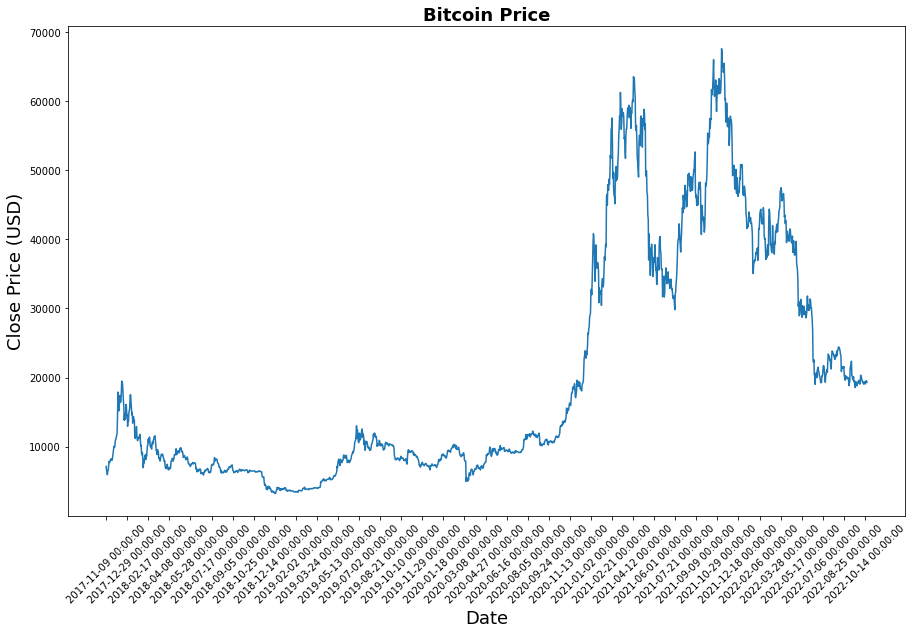

In [11]:
price = df[['BitCoin']]
plt.figure(figsize=(15,9))
plt.plot(price)
plt.xticks(range(0, df.shape[0], 50), df['Date'].loc[::50], rotation=45)
plt.title("Bitcoin Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
norm_data = min_max_scaler.fit_transform(price.values)
# Normalization
#
# The first step we will take to our data is to normalize its values.
# The goal of
#normalization is to change the values of numeric
# columns in the data set to a common #scale, without distorting
# differences in the ranges of values
#
# For our purposes, we will use MinMaxScaler from the sklearn library
print(f' Real: {price.values [0]}, Normalized: {norm_data[0]}')
print(f'Real: {price.values [500]}, Normalized: {norm_data [500]}')
print(f'Real: {price.values [1200]}, Normalized: {norm_data [1200]}')

 Real: [7143.580078], Normalized: [0.06073083]
Real: [4022.168213], Normalized: [0.01220901]
Real: [57539.94531], Normalized: [0.8441338]


In [13]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [14]:
# And the split will happen here:
past_history = 5
future_target = 0
TRAIN_SPLIT = int(len(norm_data) * 0.8)
x_train, y_train = univariate_data(norm_data,
                                   0,
                                   TRAIN_SPLIT,
                                   past_history,
                                   future_target)

x_test, y_test = univariate_data(norm_data,
                                 TRAIN_SPLIT,
                                 None,
                                 past_history,
                                 future_target)

In [15]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras. layers import Dense, LSTM, LeakyReLU, Dropout
# Set hyperparameters
num_units = 64
learning_rate = 0.0001
activation_function = "sigmoid"
loss_function = 'mse'
batch_size = 64
num_epochs = 1000
# Initialize the optimizer
optimizer = Adam(learning_rate=learning_rate)
# Initialize the RIN
model = Sequential([
    LSTM(units=num_units, activation=activation_function, input_shape= (None, 1)),
    LeakyReLU(alpha=0.5),
    Dropout (0.1),
    Dense(units=1)
])
# Compile the RNN
model.compile(optimizer=optimizer, loss=loss_function)

In [16]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.1,
    batch_size=batch_size,
    epochs=num_epochs,
    shuffle=False
)

Epoch 1/1000
21/21 [==============================] - 1s 16ms/step - loss: 1.3016 - val_loss: 2.2341
Epoch 2/1000
21/21 [==============================] - 0s 5ms/step - loss: 0.9751 - val_loss: 1.8184
Epoch 3/1000
21/21 [==============================] - 0s 5ms/step - loss: 0.7277 - val_loss: 1.4823
Epoch 4/1000
21/21 [==============================] - 0s 5ms/step - loss: 0.5447 - val_loss: 1.2103
Epoch 5/1000
21/21 [==============================] - 0s 5ms/step - loss: 0.4040 - val_loss: 0.9890
Epoch 6/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2915 - val_loss: 0.8116
Epoch 7/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2181 - val_loss: 0.6710
Epoch 8/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1617 - val_loss: 0.5591
Epoch 9/1000
21/21 [==============================] - 0s 5ms/step - loss: 0.1229 - val_loss: 0.4721
Epoch 10/1000
21/21 [==============================] - 0s 5ms/step - loss: 0.0992 - val_loss: 0.404

<AxesSubplot:>

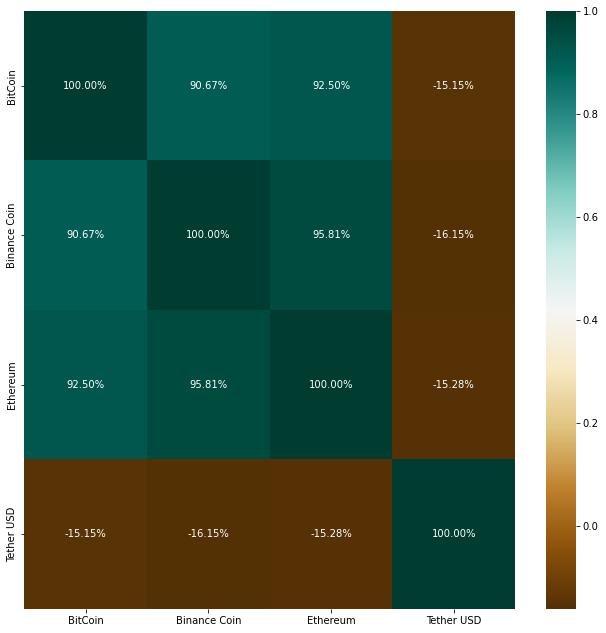

In [17]:
plt.subplots(figsize=(11,11))
sns.heatmap(df.corr(), annot=True, fmt='.2%', cmap='BrBG')

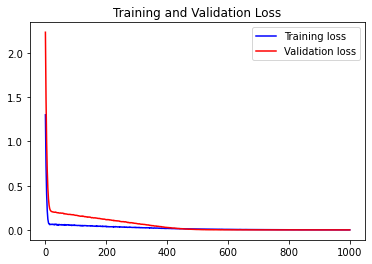

In [18]:
loss = history.history["loss"]
val_loss = history.history ['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot (epochs, val_loss,'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend ()
plt.show ()

In [20]:
#reset index 
df.set_index('Date', inplace=True)

In [21]:
#bitcoin daily and monthly returns 
bitcoin_daily_returns = df['BitCoin'].pct_change()
bitcoin_monthly_returns = df['BitCoin'].resample('M').ffill().pct_change()

print(bitcoin_daily_returns.head())
print(bitcoin_monthly_returns.head())

Date
2017-11-09         NaN
2017-11-10   -0.073554
2017-11-11   -0.039368
2017-11-12   -0.064101
2017-11-13    0.102422
Name: BitCoin, dtype: float64
Date
2017-11-30         NaN
2017-12-31    0.383326
2018-01-31   -0.277987
2018-02-28    0.017298
2018-03-31   -0.329333
Freq: M, Name: BitCoin, dtype: float64


In [22]:
#binance coin daily and monthly returns
bc_daily_returns = df['Binance Coin'].pct_change()
bc_monthly_returns = df['Binance Coin'].resample('M').ffill().pct_change()

print(bc_daily_returns.head())
print(bc_monthly_returns.head())

Date
2017-11-09         NaN
2017-11-10   -0.097415
2017-11-11   -0.070329
2017-11-12   -0.090262
2017-11-13    0.109845
Name: Binance Coin, dtype: float64
Date
2017-11-30         NaN
2017-12-31    3.324341
2018-01-31    0.290591
2018-02-28   -0.063419
2018-03-31    0.059177
Freq: M, Name: Binance Coin, dtype: float64


In [23]:
#ethereum coin daily and monthly returns
eth_daily_returns = df['Ethereum'].pct_change()
eth_monthly_returns = df['Ethereum'].resample('M').ffill().pct_change()

print(eth_daily_returns.head())
print(eth_monthly_returns.head())

Date
2017-11-09         NaN
2017-11-10   -0.067411
2017-11-11    0.051555
2017-11-12   -0.021523
2017-11-13    0.028606
Name: Ethereum, dtype: float64
Date
2017-11-30         NaN
2017-12-31    0.692483
2018-01-31    0.477813
2018-02-28   -0.235276
2018-03-31   -0.536415
Freq: M, Name: Ethereum, dtype: float64


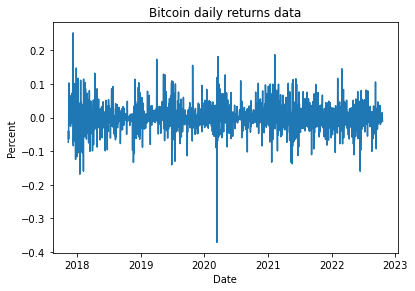

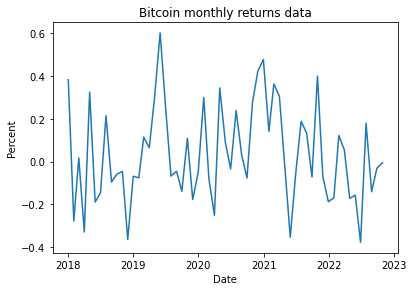

In [24]:
# plot bicoin daily and monthly returns
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(bitcoin_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Bitcoin daily returns data")
plt.show()

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(bitcoin_monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Bitcoin monthly returns data")
plt.show()

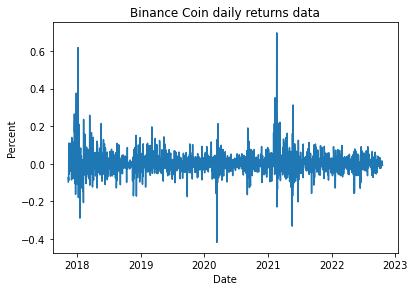

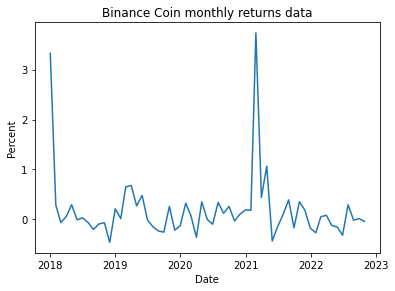

In [25]:
# plot binance coin daily and monthly returns
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(bc_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Binance Coin daily returns data")
plt.show()

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(bc_monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Binance Coin monthly returns data")
plt.show()

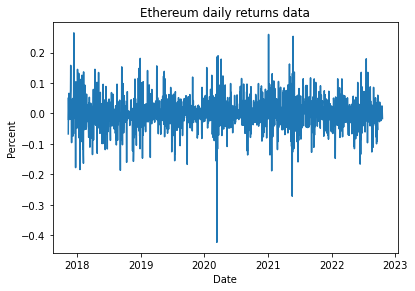

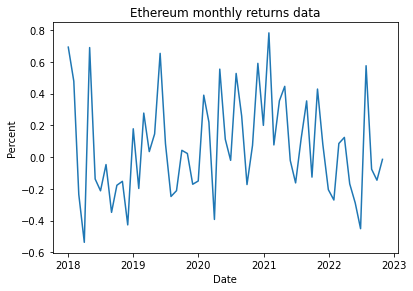

In [26]:
# plot ethereum daily and monthly returns
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(eth_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Ethereum daily returns data")
plt.show()

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(eth_monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Ethereum monthly returns data")
plt.show()